### Analyzing the Stroop Effect
(1) What is the independent variable? What is the dependent variable?

**independent variable**: congruent or incongruent condition.  
**dependent variable**: Time to complete test in seconds.

(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

Ho - **Null Hypothesis**: (  μi - μc = 0 ) There is **no** significant difference in the population average response time in viewing the congruent(c) words vs viewing the incongruent(i) words.

Ha - **Alternative Hypothesis**: ( μi - μc ≠ 0 ) There is a significant difference, positive or negative, in the population average response times.

The Dependent Samples t-Test is the appropriate statistical test as the same subjects are assigned two different conditions. The different conditions are dependent because, in theory, by doing the first test you have some practice doing it and you might have an unfair advantage due to this learning effect in doing the similar type of test second. In addition, we don't have any population parameters provided (so a z-test would not be appropriate here).
- We need to compare the means of two related groups to determine the statistically significant difference between two means.
- We are assuming distributions are nearly normal and we are comparing 2 dependent samples of data  
- our sample size less than 30 and we don't know the population standard deviations

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [6]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import t
%matplotlib inline

In [7]:
df = pd.read_csv('./stroopdata.csv')
print(df.mean(axis=0))
print(df.std(axis=0))


Congruent      14.051125
Incongruent    22.015917
dtype: float64
Congruent      3.559358
Incongruent    4.797057
dtype: float64


(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

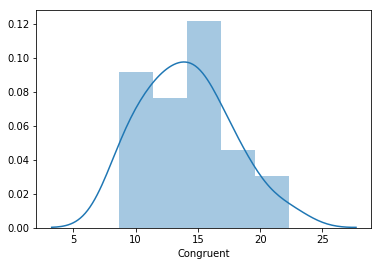

In [8]:
sns.distplot(df['Congruent'])


The data is more or less normally distributed and the middle of the data is a little bit less than 15

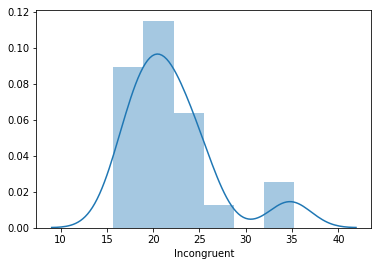

In [9]:
sns.distplot(df['Incongruent'])


There are some interesting data points on the upper end of this distribution that skew it right

The histogram plots, although both graphs visually appear somewhat positively skewed,
the mean is pretty close to the peak in both graphs which would indicate a normal distribution


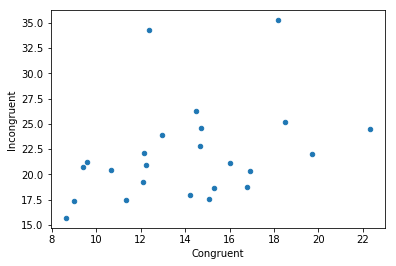

In [11]:
stroop = pd.read_csv('stroopdata.csv')
stroop.plot.scatter(x='Congruent', y='Incongruent')



Scatterplot observations:

  Two outliers stand out immediately. In the middle of the datatset, we see there are two instances of participants whose Stroop test completion times for the incongruent group are much slower relative to the relative to the rest of the sample, with times hovering around ~35 seconds.
 There appears to be a weak positive correlation between completion times.



(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [6]:
#Sample size
print(df['Congruent'].size)
print(df['Incongruent'].size)

24
24


In [12]:
#t-critical value for a 95% confidence level and 23 d.f.
t.ppf(.975, 23)

2.0686576104190406

For a confidence level of 95% and 23 degrees of freedom, our t-critical value ends up being *2.068*  

Our point estimate for the difference of the means is: 22.02 - 14.05 = 7.97

Our standard deviation of the differences is calculated below.


In [10]:
df['Difference'] = df['Congruent'] - df['Incongruent']
print("standard deviation for congruent is {0:.5f}".format(df['Difference'].std(axis=0)))

standard deviation for congruent is 4.86483


### t-statistic:

In [11]:
7.97/(4.8648 / math.sqrt(24))

8.025996238275749

Our t-statistic (**8.02**) is greater than our critical value (**2.068**),So we can **reject the null hypothesis**.  
Which matches up with what we expected, That it takes much less time to do the congruent task than it does to do the incongruent task.

###conclusion

We reject the Null Hypothesis which states that there is no significant differences between the population average completion time for the two different conditions (Congruent & Incongruent). In theory, if we were able to calculate the average difference of every single person person who took this pair of tests (the population) we expect there would be a significantly slower or significantly faster time in either the the incongruent or congruent condition. These are the results I expected since my own anecdotal experience showed that the second condition took me longer to complete. 

REFERENCES

https://en.wikipedia.org/wiki/Stroop_effect